In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels;
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [3]:
li = [1, 2, 3, 40]
li

[1, 2, 3, 40]

In [4]:
print(*li)

1 2 3 40


In [5]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512)) # 前面是卷积核的格式，后面是输出格式

In [6]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels)) 
        in_channels = out_channels
    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),  # 特点是加了dropout
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

In [7]:
net = vgg(conv_arch)

In [10]:
X = torch.rand(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape:shape:\t',X.shape)

Sequential output shape:shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:shape:	 torch.Size([1, 25088])
Linear output shape:shape:	 torch.Size([1, 4096])
ReLU output shape:shape:	 torch.Size([1, 4096])
Dropout output shape:shape:	 torch.Size([1, 4096])
Linear output shape:shape:	 torch.Size([1, 4096])
ReLU output shape:shape:	 torch.Size([1, 4096])
Dropout output shape:shape:	 torch.Size([1, 4096])
Linear output shape:shape:	 torch.Size([1, 10])


In [11]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


training on cpu


OSError: [Errno 12] Cannot allocate memory

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


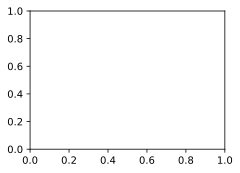

In [12]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())